<a href="https://colab.research.google.com/github/fahemanabi/Data_Analytics_2/blob/main/MachineLearningGuided_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

Fahema Nabi


In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Get the Data
**Read in the advertising.csv file and load it to a data frame called ad_data.**
The dATA PATH:
https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv

In [11]:
ad_data = df_raw = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv')

**Check the head of ad_data**

In [12]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [16]:
#info
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [17]:
#count
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


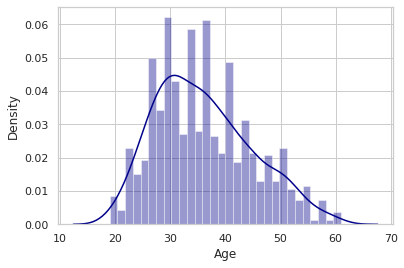

In [29]:
sns.set_style("whitegrid")
sns.distplot(ad_data['Age'].dropna(), color='darkblue', bins=30)

**Create a jointplot showing Area Income versus Age.**

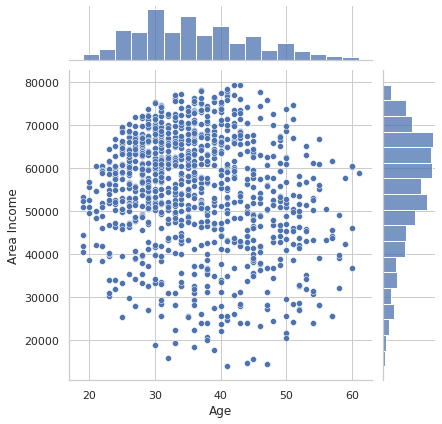

In [32]:
sns.set_style("whitegrid")
sns.jointplot(x= 'Age',y='Area Income', data=ad_data)

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

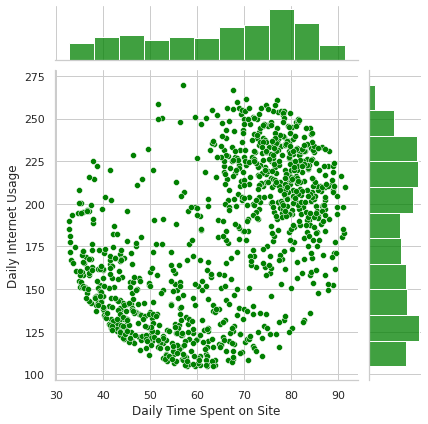

In [35]:
sns.set_style("whitegrid")
sns.jointplot(x= 'Daily Time Spent on Site',y='Daily Internet Usage', data=ad_data, color='green')

# Logistic Regression

Now it's time to do a train test split, and train the model.

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [46]:
#create new variable for the data set that we will spilit,let say ds=
ds = ad_data

In [50]:
#configuring inputs and dependable variable
#Let have values from our colums as input ,call it X (usually we designate the input as capital X)
#X=ds ['Daily Time Spent on Site','ccccc',](all colums are going to be as an input )
#y=ds [name of dependent variable as an out put,Let say, 'Clicked on Ad']
y = ds['Clicked on Ad']
X = ds[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]

In [56]:
# we spilit the date for terain and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [58]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

** Train and fit a logistic regression model on the training set.**

In [59]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [60]:
y_pred = logmodel.predict(X_test)

** Create a classification report for the model.**

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       136
           1       0.99      0.96      0.98       114

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



[[135   1]
 [  4 110]]


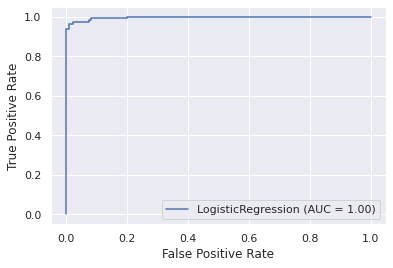

In [71]:
from sklearn import  metrics
metrics.plot_roc_curve(logmodel, X_test, y_test)
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))


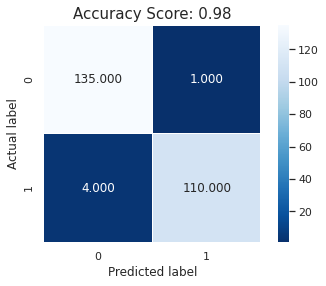

In [68]:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

Conclusions:
- The higher the daily internet usage, the higher the daily time spent on the site was 
- The true positive rate increases even as the false positive rate stays the same 
- True postive of 135. Predicted that 135 people clicked the ad and it was right
- False Positive of 1. Predicited that 1 person clicked the ad and it was wrong
- False negative of 4. Predicted that 4 people did not click the ad and was wrong
- True negative of 110. Predicted that 110 people did not click the ad and it was right
- The recall is "how many of this class you find over the whole number of element of this class". Our model is able to correctly idenfity about 98% of all the people that actually clicked on the ad
- The precision is "how many are correctly classified among that class" which means that when our model predicts a user will click on an ad, it is correct 98% of the time. 
- Precision is the measure of our model's accuracy on what we're testing while recall compares the people that the model said clicked on the ad to the total amount of people that actually clciked on the ad.